# **About NETFLIX**
Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

### Business Problem
Analysing the data and genarate insighs of Netflix  to decide which type of content should be produced and how to grow as a business in different countries and finding strategy to create more revenue

**Dataset**
Link:https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

This dataset is consists of these parameters and variables



Show_id: Unique ID for every Movie / Tv Show
Type: Identifier - A Movie or TV Show
Title: Title of the Movie / Tv Show
Director: Director of the Movie
Cast: Actors involved in the movie/show
Country: Country where the movie/show was produced
Date_added: Date it was added on Netflix
Release_year: Actual Release year of the movie/show
Rating: TV Rating of the movie/show
Duration: Total Duration - in minutes or number of seasons
Listed_in: Genre
Description: The summary description



# 1. Defining Problem Statement and Analysing basic metrics.


**Problem Statement**

Perform data exploration and visualisation on the Netflix dataset to uncover insights that could help Netflix in decisionmaking regarding which type of shows/movies to produce and how to grow the business in different countries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
df = pd.read_csv('netflix.csv')

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 44.6MB/s]


In [ ]:
import warnings
import re
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**Analysis of Basic Metrics**
 The dataset contains 8807 rows and 12 columns.
 It has the following attributes-

 Show id
 Type
 Title
 Director
 Cast
 Country
 Date added
 Release year
 Rating
 Duration
 Listed_in
 Description

# 2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary.

In [ ]:
# exploring the dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [ ]:
#shape of the dataset
df.shape

(8807, 12)

In [ ]:
#checking the columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
#checking duplicate
df.duplicated().any()

False

In [ ]:
#checking the number of missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
(df.isnull().sum()).sum()

4307

Above we can clearly see that there are some null values in the dataset. There are total 4307 null values present in the entire dataset out of which 2634 missing points under 'director', 831 under 'country', 825 under 'cast', 10 under 'date_added', 4 under 'rating', and 3 under 'duration'. so
before diving into EDA we first need to handle all these null values.

In [ ]:
# Statistical Summary of Netflix Dataset
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Statistical Summary :
No of records available : 8807

mean of release year : 2014.18

Standard deviation of release year : 8.82

minimum of movies and TV Shows release year : 1925

25% of movies and TV Shows release year : 2013

50% of movies and TV Shows release year 2017

75% of movies and TV Shows release year 2019

max of movies and TV Shows release year 2021

# 3. Non-Graphical Analysis: Value counts and unique attributes.


In [ ]:
# No of Movies & TV Shows reclease in country
df['country'].str.split(',', expand=True).stack().value_counts()

United States     3211
India             1008
United Kingdom     628
 United States     479
Canada             271
                  ... 
 Ecuador             1
Iran                 1
Cyprus               1
 Mongolia            1
 Montenegro          1
Length: 197, dtype: int64

In [ ]:
df['country'].str.split(',')

0       [United States]
1        [South Africa]
2                   NaN
3                   NaN
4               [India]
             ...       
8802    [United States]
8803                NaN
8804    [United States]
8805    [United States]
8806            [India]
Name: country, Length: 8807, dtype: object

In [ ]:
df['country'].str.split(',',expand=True)

,0,1,2,3,4,5,6,7,8,9,10,11
0,United States,None,None,None,None,None,None,None,None,None,None,None
1,South Africa,None,None,None,None,None,None,None,None,None,None,None
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,India,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,United States,None,None,None,None,None,None,None,None,None,None,None
8803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8804,United States,None,None,None,None,None,None,None,None,None,None,None
8805,United States,None,None,None,None,None,None,None,None,None,None,None


In [ ]:
df['country'].str.split(',',expand=True).stack()

0     0    United States
1     0     South Africa
4     0            India
7     0    United States
      1            Ghana
               ...      
8801  1           Jordan
8802  0    United States
8804  0    United States
8805  0    United States
8806  0            India
Length: 10019, dtype: object

In [ ]:
# No of Release from Directors
df['director'].str.split(',', expand=True).stack().value_counts()

Rajiv Chilaka       22
Raúl Campos         18
 Jan Suter          18
Marcus Raboy        16
Suhas Kadav         16
                    ..
Will Eisenberg       1
Marina Seresesky     1
Kenny Leon           1
James Dearden        1
Mozez Singh          1
Length: 5120, dtype: int64

In [ ]:
# No of Movies & TV Shows done by actor
df['cast'].str.split(',', expand=True).stack().value_counts()

 Anupam Kher              39
 Rupa Bhimani             31
 Takahiro Sakurai         30
 Julie Tejwani            28
 Om Puri                  27
                          ..
 Vedika                    1
 Tedros Teclebrhan         1
 Maryam Zaree              1
 Melanie Straub            1
 Chittaranjan Tripathy     1
Length: 39296, dtype: int64

In [ ]:
#movie release distribution
df.date_added.value_counts()

January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
December 4, 2016       1
November 21, 2016      1
November 19, 2016      1
November 17, 2016      1
January 11, 2020       1
Name: date_added, Length: 1767, dtype: int64

In [ ]:
#number of releases per year
df.release_year.value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [ ]:
#ratings distribution
df.rating.value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [ ]:
df[df['type'] == "Movie"].duration.value_counts()

90 min     152
94 min     146
93 min     146
97 min     146
91 min     144
          ... 
212 min      1
8 min        1
186 min      1
193 min      1
191 min      1
Name: duration, Length: 205, dtype: int64

In [ ]:
df[df['type'] == "TV Show"].duration.value_counts()

1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
15 Seasons       2
12 Seasons       2
11 Seasons       2
17 Seasons       1
Name: duration, dtype: int64

In [ ]:
df['listed_in'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).to_frame('Genres').value_counts()

Genres                   
 International Movies        2624
Dramas                       1600
Comedies                     1210
Action & Adventure            859
Documentaries                 829
                             ... 
Romantic Movies                 3
Spanish-Language TV Shows       2
TV Sci-Fi & Fantasy             1
LGBTQ Movies                    1
Sports Movies                   1
Length: 73, dtype: int64

In [ ]:
df['listed_in'].str.split(',', expand=True).stack().value_counts()

 International Movies        2624
Dramas                       1600
Comedies                     1210
Action & Adventure            859
Documentaries                 829
                             ... 
Romantic Movies                 3
Spanish-Language TV Shows       2
LGBTQ Movies                    1
TV Sci-Fi & Fantasy             1
Sports Movies                   1
Length: 73, dtype: int64

In [ ]:
# Number of unique data for each column
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

The Type attribute has 2666 TV shows and 6131 Movies.
The Rating attribute has TV-MA ratings with 3209 occurrences followed by TV-14 with 2157 occurrences.
The Listed in attribute with the highest count is International Movies with 2624 occurrences.
** Unique Attributes** The dataset contains 748 unique countries, 8807 unique titles, 4528 unique directors, 7692 unique cast members and 17
unique rating

# 4. Visual Analysis - Univariate, Bivariate after pre-processing of the data.

In [ ]:
var=df['director'].apply(lambda x:str(x).split(', ' )).tolist()
df_director=pd.DataFrame(var,index=df['title'])
df_director=df_director.stack().reset_index()
df_director.rename(columns={0:'director'},inplace=True)
df_director.drop(['level_1'],axis=1,inplace=True)
df_director.head()


,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan


In [ ]:
 # unnesting the cast column
const=df['cast'].apply(lambda x:str(x).split(', ' )).tolist()
df_cast=pd.DataFrame(const,index=df['title'])
#df_cast=df_cast.stack().reset_index()
#df_cast.rename(columns={0:'actor'},inplace=True)
#df_cast.drop(['level_1'],axis=1,inplace=True)
df_cast.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
title,,,,,,,,,,,,,,,,,,,,,
Dick Johnson Is Dead,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Blood & Water,Ama Qamata,Khosi Ngema,Gail Mabalane,Thabang Molaba,Dillon Windvogel,Natasha Thahane,Arno Greeff,Xolile Tshabalala,Getmore Sithole,Cindy Mahlangu,...,None,None,None,None,None,None,None,None,None,None
Ganglands,Sami Bouajila,Tracy Gotoas,Samuel Jouy,Nabiha Akkari,Sofia Lesaffre,Salim Kechiouche,Noureddine Farihi,Geert Van Rampelberg,Bakary Diombera,None,...,None,None,None,None,None,None,None,None,None,None
Jailbirds New Orleans,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Kota Factory,Mayur More,Jitendra Kumar,Ranjan Raj,Alam Khan,Ahsaas Channa,Revathi Pillai,Urvi Singh,Arun Kumar,None,None,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
# unnesting the country column

const=df['country'].apply(lambda x:str(x).split(', ' )).tolist()
df_country=pd.DataFrame(const,index=df['title'])
df_country=df_country.stack().reset_index()
df_country.rename(columns={0:'country'},inplace=True)
df_country.drop(['level_1'],axis=1,inplace=True)
df_country.head()

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India


In [ ]:
df.loc[df['duration'].isnull(),'duration']=df.loc[df['duration'].isnull(),'duration'].fillna(df['rating'])
df.loc[df['rating'].str.contains('min',na=False),'rating']='NR'
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# removing min from data
df['duration']=df['duration'].str.replace("min",'')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df['duration_copy']=df['duration'].copy()
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_copy
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",90
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2 Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1 Season
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1 Season
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2 Seasons


In [ ]:
df.loc[df['duration_copy'].str.contains('Season',na=False),'duration_copy']=0
df['duration_copy']=df['duration_copy'].astype('int')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_copy
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",90
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,0


In [ ]:
df['duration_copy'].unique()

array([ 90,   0,  91, 125, 104, 127,  67,  94, 161,  61, 166, 147, 103,
        97, 106, 111, 110, 105,  96, 124, 116,  98,  23, 115, 122,  99,
        88, 100, 102,  93,  95,  85,  83, 113,  13, 182,  48, 145,  87,
        92,  80, 117, 128, 119, 143, 114, 118, 108,  63, 121, 142, 154,
       120,  82, 109, 101,  86, 229,  76,  89, 156, 112, 107, 129, 135,
       136, 165, 150, 133,  70,  84, 140,  78,  64,  59, 139,  69, 148,
       189, 141, 130, 138,  81, 132, 123,  65,  68,  66,  62,  74, 131,
        39,  46,  38, 126, 155, 159, 137,  12, 273,  36,  34,  77,  60,
        49,  58,  72, 204, 212,  25,  73,  29,  47,  32,  35,  71, 149,
        33,  15,  54, 224, 162,  37,  75,  79,  55, 158, 164, 173, 181,
       185,  21,  24,  51, 151,  42,  22, 134, 177,  52,  14,  53,   8,
        57,  28,  50,   9,  26,  45, 171,  27,  44, 146,  20, 157,  17,
       203,  41,  30, 194, 233, 237, 230, 195, 253, 152, 190, 160, 208,
       180, 144,   5, 174, 170, 192, 209, 187, 172,  16, 186,  1

In [ ]:
df['duration'].unique()

array(['90 ', '2 Seasons', '1 Season', '91 ', '125 ', '9 Seasons', '104 ',
       '127 ', '4 Seasons', '67 ', '94 ', '5 Seasons', '161 ', '61 ',
       '166 ', '147 ', '103 ', '97 ', '106 ', '111 ', '3 Seasons', '110 ',
       '105 ', '96 ', '124 ', '116 ', '98 ', '23 ', '115 ', '122 ', '99 ',
       '88 ', '100 ', '6 Seasons', '102 ', '93 ', '95 ', '85 ', '83 ',
       '113 ', '13 ', '182 ', '48 ', '145 ', '87 ', '92 ', '80 ', '117 ',
       '128 ', '119 ', '143 ', '114 ', '118 ', '108 ', '63 ', '121 ',
       '142 ', '154 ', '120 ', '82 ', '109 ', '101 ', '86 ', '229 ',
       '76 ', '89 ', '156 ', '112 ', '107 ', '129 ', '135 ', '136 ',
       '165 ', '150 ', '133 ', '70 ', '84 ', '140 ', '78 ', '7 Seasons',
       '64 ', '59 ', '139 ', '69 ', '148 ', '189 ', '141 ', '130 ',
       '138 ', '81 ', '132 ', '10 Seasons', '123 ', '65 ', '68 ', '66 ',
       '62 ', '74 ', '131 ', '39 ', '46 ', '38 ', '8 Seasons',
       '17 Seasons', '126 ', '155 ', '159 ', '137 ', '12 ', '273 ', '36 ',


# 4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis.

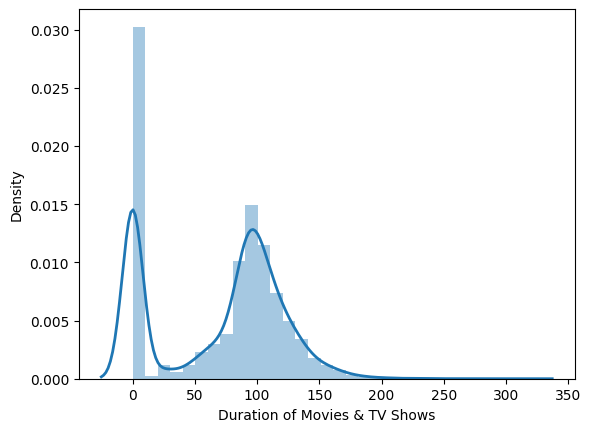

In [ ]:
# Continous variable displot
sns.distplot(df['duration_copy'], kde_kws={'linewidth':2})
plt.xlabel('Duration of Movies & TV Shows')
plt.ylabel('Density')
plt.show()

ValueError: cannot reindex on an axis with duplicate labels

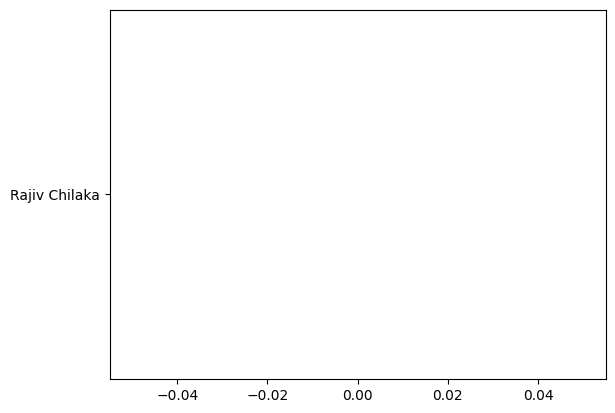

In [ ]:
# count plot for Top 20 Deirectors
filtered_directors = df.set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:20])
plt.title('Top 20 Directors on Netflix')
plt.xlabel('Count')
plt.ylabel('Directors')
plt.show()

ValueError: cannot reindex on an axis with duplicate labels

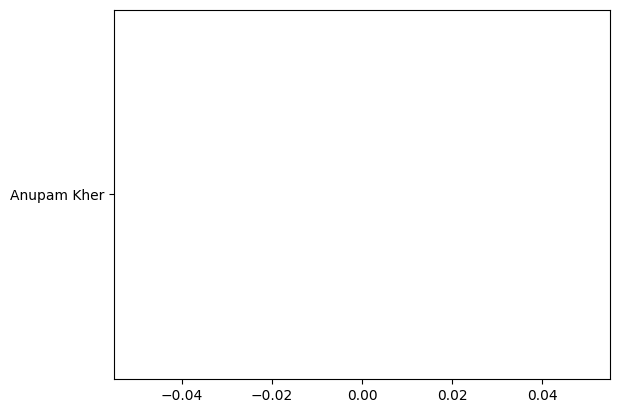

In [ ]:
# count plot for Top 20 Actors
filtered_cast = df.set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = filtered_cast, order=filtered_cast.value_counts().index[:20])
plt.title('Top 20 Actors on Netflix')
plt.xlabel('Count')
plt.ylabel('Actors')
plt.show()

ValueError: cannot reindex on an axis with duplicate labels

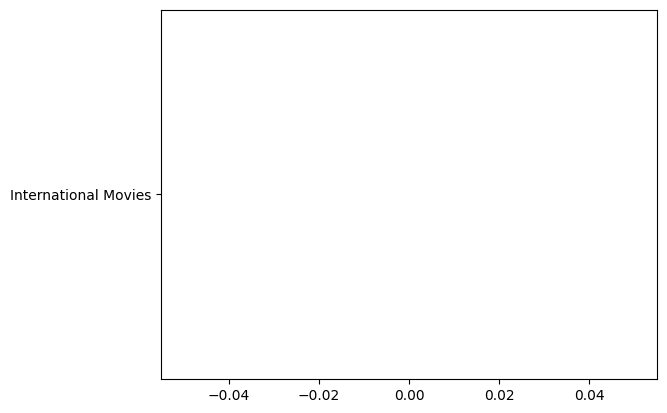

In [ ]:
# count plot for Top 20 Genres
filtered_genres = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

In [ ]:
# count plot for Top 20 Countries
filtered_countries = df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:20])
plt.title('Top 20 Countries on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

In [ ]:
# Netflix content By Ratings.
sns.barplot(x=df.rating.value_counts(), y=df.rating.value_counts().index,data=df)
plt.xlabel('Rating for Movies & TV Shows')
plt.ylabel('Rating')
plt.title('Rating for Movies & TV Shows Count')
plt.show()

In [ ]:
# Release Year wise count
sns.countplot(y="release_year",data=df, order = df.release_year.value_counts().index[0:15])
plt.xlabel('Movie & Tv Shows Count')
plt.ylabel('Release Year')
plt.title('Movies & TV Shows Releases Yearly')
plt.show()

# 4.2 For categorical variable(s): Boxplot. :

In [ ]:
# The box plots tell more than just the average release year
plt.figure(figsize=(8,10))
sns.boxplot(y='release_year', x='rating', data=df)
sns.despine(left=True)
plt.xticks(rotation=90)
plt.ylim(1940,2023)
plt.xlabel('Rating')
plt.ylabel('Release Year')
plt.title('Type of Rating Given on Movie & TV Shows')
plt.show()

# 4.3 For correlation: Heatmaps, Pairplots.

In [ ]:
sns.pairplot(df)
plt.title('Pair Plot for Release year')
plt.show()

# 5. Missing Value & Outlier check (Treatment optional).

In [ ]:
# unnesting the listed_in column
const=df['listed_in'].apply(lambda x:str(x).split(', ' )).tolist()
df_genre=pd.DataFrame(const,index=df['title'])
df_genre=df_genre.stack().reset_index()
df_genre.rename(columns={0:'genre'},inplace=True)
df_genre.drop(['level_1'],axis=1,inplace=True)
df_genre.head()

In [ ]:
# merging the unnested director data with unnested actors data
df_merge1=df_cast.merge(df_director,on=['title'],how='inner')
# merging the above merge data with unnested genre data
df_merge2=df_merge1.merge(df_genre,on=['title'],how='inner')
# merging the above merged data with unnested country data
df_merge=df_merge2.merge(df_country,on=['title'],how='inner')
df_merge['actor'].replace(['nan'],['Unknown Actor'],inplace=True)
df_merge['director'].replace(['nan'],['Unknown Director'],inplace=True)
df_merge['country'].replace(['nan'],[np.nan],inplace=True)
df_merge.head()

In [ ]:
# merging our unnested data with the original data
df_final=df_merge.merge(df[['show_id', 'type', 'title', 'date_added', 'release_year', 'rating', 'duration']],on=['title'],how='left')
df_final.head()


In [ ]:
df_final.isnull().sum()

In [ ]:
# In duration column, it was observed that the nulls had values
# which were written in corresponding ratings column,
 # i.e. you can't expect ratings to be in min. # So the duration column nulls are replaced by corresponding
# values in ratings column
df_final.loc[df_final['duration'].isnull(),'duration']=df_final.loc[df_final['duration'].isnull(),'duration'].fillna(df_final['rating'])
df_final.isnull().sum()

In [ ]:
# Ratings can't be min, so it has been made NR(Non-Rated)
df_final.loc[df_final['rating'].str.contains('min',na=False),'rating']='NR'
df_final['rating'].fillna('NR',inplace=True)
df_final.isnull().sum()

In [ ]:
# date added column is imputed on the basis of release year,i.e- suppose there's a null for date_added
# when release year was 2013.So below piece of code just checks the mode of date added for release year=2013
 # and imputes in place of nulls the corresponding mode
for i in df_final[df_final['date_added'].isnull()]['release_year'].unique():
  imp=df_final[df_final['release_year']==i]['date_added'].mode().values[0]
  df_final.loc[df_final['release_year']==i,'date_added']=df_final.loc[df_final['release_year']==i,'date_added'].fillna(imp)
df_final.isnull().sum()


In [ ]:
# country column is imputed on the basis of director,i.e- suppose there's a null for country
# when we have a director whose other movies have a country given. # So below piece of code just checks the mode of country for the director
# and imputes in place of nulls the corresponding mode
for i in df_final[df_final['country'].isnull()]['director'].unique():
  if i in df_final[~df_final['country'].isnull()]['director'].unique():
    imp=df_final[df_final['director']==i]['country'].mode().values[0]
    df_final.loc[df_final['director']==i,'country']=df_final.loc[df_final['director']==i,'country'].fillna(imp)
df_final.isnull().sum()

In [ ]:
# So we imputed the country column on the basis of directors
# whose other movie titles had countries given.
# But there might be directors who have only one occurence # in our data. In that scenario, I have used Actors as a basis.
# i.e- for this Actor majorly acts in movies of which country? # Imputation has been done on this basis. For remaining rows,
# country has been filled as Unknown Country
for i in df_final[df_final['country'].isnull()]['actor'].unique():
  if i in df_final[~df_final['country'].isnull()]['actor'].unique():
    imp=df_final[df_final['actor']==i]['country'].mode().values[0]
    df_final.loc[df_final['actor']==i,'country']=df_final.loc[df_final['actor']==i,'country'].fillna(imp)
df_final.isnull().sum()

In [ ]:
# If there are still nulls, I just replace it by Unknown Country
df_final['country'].fillna('Unknown Country',inplace=True)
df_final.isnull().sum()

In [ ]:
df_final.head()

# 6. Insights based on Non-Graphical and Visual Analysis.

In [ ]:
df_final['duration_copy']=df_final['duration'].copy()
df_final1=df_final.copy()
df_final1.loc[df_final1['duration_copy'].str.contains('Season'),'duration_copy']=0
df_final1['duration_copy']=df_final1['duration_copy'].astype('int')
df_final1.head()

In [ ]:

# Converting the 'date_added' column to datetime format
df_final1["date_added"] = pd.to_datetime(df_final1['date_added'])
df_final1['month_added']=df_final1['date_added'].dt.month
df_final1['week_Added']=df_final1['date_added'].dt.week
df_final1['year']=df_final1['date_added'].dt.year
df_final1.head()

In [ ]:
df_year=df_final1.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year,x='year',y='title')
plt.ylabel("Movies Released in the year")
plt.xlabel("Year")
plt.show()

The Amount of Content across Netflix has increased from 2008 continuously till 2019. Then started decreasing from here(probably due to Covid)

In [ ]:
df_week=df_final1.groupby(['week_Added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(8,5))
sns.lineplot(data=df_week, x='week_Added', y='title')
plt.ylabel("Movies Released in the Week")
plt.xlabel("Week No.")
plt.show()

Most of the Content across Netflix is added in the first week of the year

In [ ]:
df_month=df_final1.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("Movies Released in the Month")
plt.xlabel("Month")
plt.show()

Most of the content is added in the first and last months across Netflix

# 6.1 Comments on the range of attributes.

The data ranges from 1925 to 2021, containing international TV shows and movies with multiple genres and ratings.

We can see that there are total 8807 rows and 12 columns present in the dataset. the summary also includes list of all columns with their data types and the number of non-null values in each column.

The data distributed across years and ranges from 1925 to 2021 with an average of 2014. Duration: The duration data ranges for TV Show is 1 to 16 Seasons with a mean of 1.7, and for Movies is 1 to 312 minutes with a mean of 99.4minutes.

# 6.2 Comments on the distribution of the variables and relationship between them

The data is mostly based on avarage values,we see a trend of declining releases after 2020

most of the releases were during 1st or last week of the year

The duration of movies and tv shows are declining in length with year

# 6.3 Comments for each univariate and bivariate plot

Univariate and Bivariate plots show that the data is centred around the average value, with a few observations having values much higher or lower. A few outliers are detected in the duration attribute. The distribution of
duration in minutes for different types of TV shows and movies does not show any significant differences.

# Business Insights.

This data analysis shows that the short duration movies and tv series are more popular among viewers.TV-MA  has the most viewers ,so these kind of contents should be pushed more.
inernational movies and drama is popular irrespective of country .

Drama and comedy are most viewed genre

United States is leading across both TV Shows and Movies, UK also provides great content across TV Shows and Movies. Surprisingly India is much more prevalent in Movies as compared TV Shows.

# 8. Recommendations.



1.   As Drama and comedy is the most popular genre then more content like those can be released
2.   Indian market is more prevalent movies as compared to tvs so more movies can be relaesed than TV shows
3.   Shorter length contents have more viewership,so those kind of content can be released more
4. The releases are more during 1st or last quarter of the year,so release dates can be distributed in a way that there is a uniformity,so that it can engage viewers whole year,and earning more profit through continueous subscription

